In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers.legacy import Optimizer
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.regularizers import l2

! pip install -q scikeras
from scikeras.wrappers import KerasRegressor

import pickle

In [2]:
data = pd.read_csv('Indian ATM preprocessed.csv')
data

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-0.420395,-0.304479,0.120964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,503400.0
1,-1.296688,-1.199232,-1.463074,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,123800.0
2,-0.858541,-1.074961,-0.911767,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,287700.0
3,2.628376,2.255508,1.078115,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,945300.0
4,2.409303,-0.031083,-0.276599,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,767900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12670,-0.402139,0.093189,0.346663,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,5.0,2.0,8.0,498300.0
12671,-0.055272,-0.602730,-0.102665,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,5.0,2.0,8.0,544800.0
12672,0.547179,-0.329333,-0.135278,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,5.0,2.0,8.0,608600.0
12673,0.072520,0.267168,1.646505,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,5.0,2.0,8.0,902500.0


In [3]:
tr = int(len(data) * 0.8)

X, y = data.iloc[:, :32], data.iloc[:, 32]

X_train, X_test = X[:tr], X[tr:]
y_train, y_test = y[:tr], y[tr:]

In [7]:


# Define Pinball loss function
def pinball_loss(q):
    def loss(y_true, y_pred):
        error = y_true - y_pred
        return tf.reduce_mean(tf.maximum(q * error, (q - 1) * error), axis=-1)
    return loss



In [8]:

# Set the quantile you want to predict (e.g., 0.5 for median)
q = 0.95
num_features = X_train.shape[1]

model = Sequential([
    Dense(64, activation='relu', input_shape=(num_features,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])


# Compile the model with pinball loss for quantile regression
model.compile(optimizer=Adam(learning_rate=0.001), loss=pinball_loss(q))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,753 (73.25 KB)

 Trainable params: 18,753 (73.25 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 451402.9688 - val_loss: 37917.6484
Epoch 2/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 34281.4180 - val_loss: 21007.7246
Epoch 3/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20515.5996 - val_loss: 17868.3906
Epoch 4/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17596.9805 - val_loss: 17167.6953
Epoch 5/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15478.0762 - val_loss: 18125.8281
Epoch 6/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12952.7178 - val_loss: 20595.1426
Epoch 7/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11787.6104 - val_loss: 23887.6426
Epoch 8/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 11085.4658 - val_loss: 22420.2285
Epoch 9/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10218.8271 - val_loss: 24431.7227
Epoch 10/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9828.8633 - val_loss: 24101.5234
Epoch 11/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

In [10]:
model.save('quantile_reg.keras')
model.save('quantile_reg.h5')

with open('quantile_reg.pkl', 'wb') as file:

    pickle.dump(model, file)

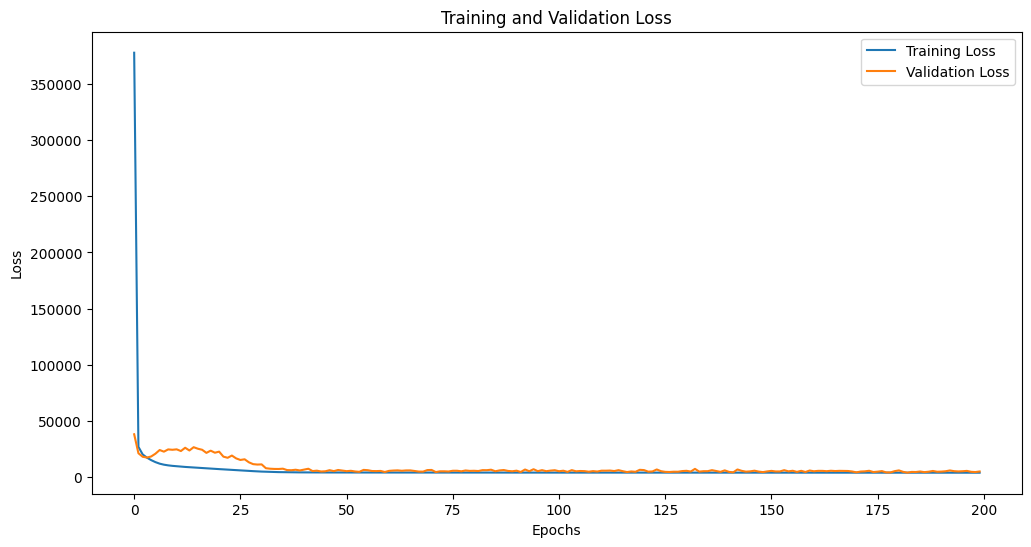

In [13]:
# history = hsitory
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [32]:
# Predict quantiles for prediction intervals
mean_pred = model.predict(X_test).flatten()

# Assume a constant variance model (for simplicity) or use another model for variance estimation
# Calculate the prediction interval (PI) as [mean_pred - 1.96*std, mean_pred + 1.96*std]
# Here we use a fixed std deviation for demonstration

std_dev_pred = np.std(y_train)  # Using the std of training data for simplicity

lower_bound = mean_pred - 1.96 * std_dev_pred
lower_bound = lower_bound.flatten()
mae = mean_absolute_error(y_test, mean_pred)
lower_bound = np.where(lower_bound < 0, mean_pred - 1.96 * mae, lower_bound)
lower_bound = np.where(lower_bound < 0, 0, lower_bound)

upper_bound = mean_pred + 1.96 * std_dev_pred
upper_bound = upper_bound.flatten()

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [33]:

def plot(y_train, y_test, lower_bound, upper_bound):

    test_len = 100
    train_len = len(y_train) - 300
    X_axis = range(train_len + test_len)

    plt.figure(figsize=(20,8))

    plt.fill_between(
        range(300, 400),
        lower_bound.flatten()[:test_len],
        upper_bound.flatten()[:test_len],
        color="orange",
        alpha=0.5,
        label="95% Prediction Interval",
        zorder=1
    )

    plt.plot(range(300), y_train[train_len:], color='blue', zorder=2, label='Original Value')
    plt.plot(range(300, 400), y_test[:test_len], color='blue', zorder=2)


    plt.legend()
    plt.xlabel("Timeline")
    plt.ylabel("Transaction Amount")
    plt.title(f"Prediction Intervals using Quantile Regression (Quantile {q})")
    plt.show()


In [34]:

def picp_mpiw(y_test, lower_bound, upper_bound):

    # Check if true targets fall within the PIs
    within_pi = (y_test >= lower_bound) & (y_test <= upper_bound)

    # Calculate PICP
    PICP = np.mean(within_pi)

    # print("\nConfidence Interval: ", PICP)
    print("\nPrediction Interval Coverage Probability (PICP):", PICP)

    # Calculate the width of the prediction intervals
    pi_width = upper_bound - lower_bound

    # Calculate MPIW
    MPIW = np.mean(pi_width)
    print("Mean Prediction Interval Width (MPIW):", MPIW)


In [35]:
outcome = (y_test > lower_bound) & (y_test < upper_bound)
outcome = outcome.apply(lambda x: 0 if x ==True else 1)
results = pd.DataFrame({'Original': y_test, 'Predicted': mean_pred,
                        'Lower Bound': lower_bound, 'Upper Bound': upper_bound,
                        # 'Total Error': (upper_bound + lower_bound) / 2 - (y_test),
                       'Outcome': outcome})

# New file
results.to_csv('Results_Quant_Reg.csv', index=False)
results

,Original,Predicted,Lower Bound,Upper Bound,Outcome
10140,19700.0,43152.050781,0.000000,5.131324e+05,0
10141,113500.0,193153.796875,115910.484375,6.631342e+05,1
10142,593300.0,733694.000000,263713.625000,1.203674e+06,0
10143,221600.0,234042.078125,156798.765625,7.040224e+05,0
10144,45500.0,73270.234375,0.000000,5.432506e+05,0
...,...,...,...,...,...
12670,498300.0,511164.906250,41184.531250,9.811452e+05,0
12671,544800.0,582673.125000,112692.750000,1.052654e+06,0
12672,608600.0,734046.625000,264066.250000,1.204027e+06,0
12673,902500.0,879762.625000,409782.250000,1.349743e+06,0


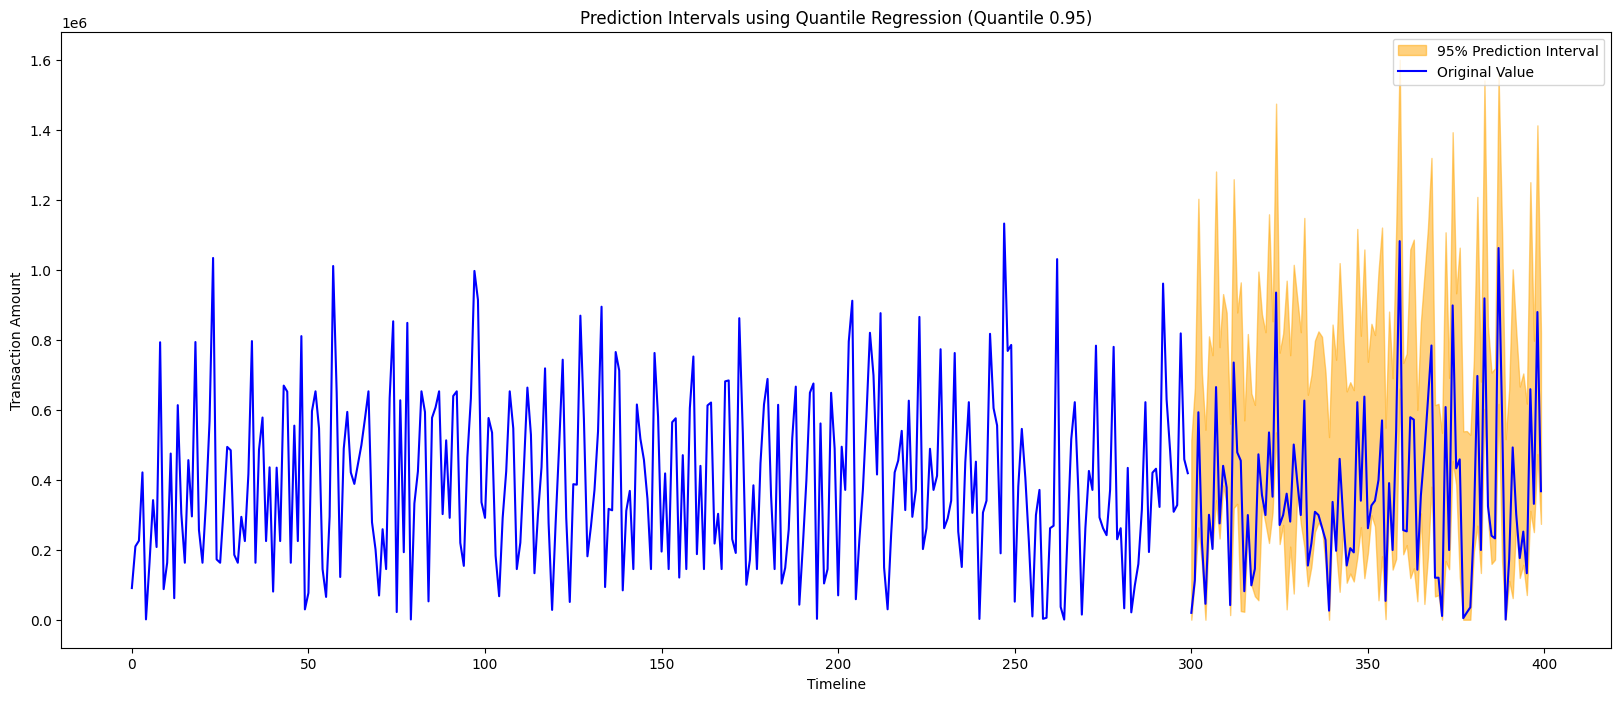

In [36]:
plot(y_train, y_test, lower_bound, upper_bound)

In [38]:
picp_mpiw(y_test, lower_bound, upper_bound)


Prediction Interval Coverage Probability (PICP): 0.9577909270216962
Mean Prediction Interval Width (MPIW): 687398.7


In [45]:
# from stored old file

result_qr = pd.read_csv('Results_Quant_Reg.csv')
lower_bound = np.array(result_qr['Lower Bound'])
upper_bound = np.array(result_qr['Upper Bound'] )

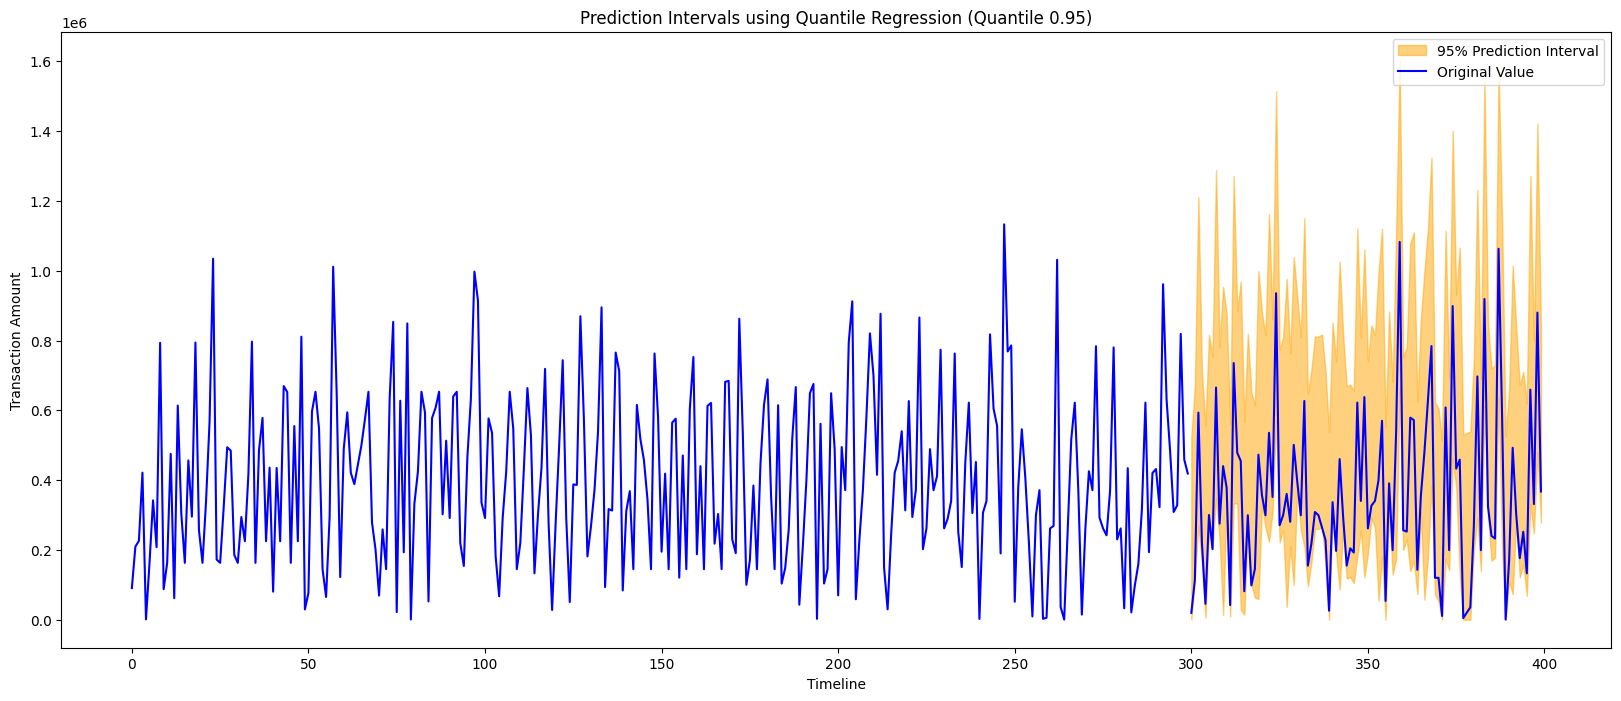

In [46]:
plot(y_train, y_test, lower_bound, upper_bound)


In [47]:
picp_mpiw(y_test, lower_bound, upper_bound)



Prediction Interval Coverage Probability (PICP): 0.9637080867850099
Mean Prediction Interval Width (MPIW): 690264.1902549467
